In [1]:
!pip install interpret-community
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lime
!{sys.executable} -m pip install tensorflow
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

You should consider upgrading via the '/home/bsorinol/jupyter/jupyterenv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/bsorinol/jupyter/jupyterenv/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/home/bsorinol/jupyter/jupyterenv/bin/python -m pip install --upgrade pip' command.


In [2]:
loc = r'../smarttens_coach_dataset/'
loc_g = r'../smarttens_coach_dataset/good_pose'
loc_b = r'../smarttens_coach_dataset/bad_pose'



import os  
label=[]   #List for labels
# for i in os.listdir(loc_g):    #looping the directory
#         label.append('1') #good pose
# for j in os.listdir(loc_b):    #looping the directory
#         label.append('0') #bad pose
    
print(label)

# # Good Pose Dataset
# p=os.listdir(loc_g)
# for i in range(len(p)):
#   p[i]= os.path.join(loc_g,p[i]) 

# Bad Pose Dataset
p=os.listdir(loc_b)
for i in range(len(p)):
  p[i]= os.path.join(loc_b,p[i]) 


print(p)

import random

# random.shuffle(p);

[]
['../smarttens_coach_dataset/bad_pose/171010.jpg', '../smarttens_coach_dataset/bad_pose/196012.jpg', '../smarttens_coach_dataset/bad_pose/16007.jpg', '../smarttens_coach_dataset/bad_pose/347003.jpg', '../smarttens_coach_dataset/bad_pose/295992.jpg', '../smarttens_coach_dataset/bad_pose/3709916.jpg', '../smarttens_coach_dataset/bad_pose/422003.jpg', '../smarttens_coach_dataset/bad_pose/349912.jpg', '../smarttens_coach_dataset/bad_pose/1229911.jpg', '../smarttens_coach_dataset/bad_pose/216012.jpg', '../smarttens_coach_dataset/bad_pose/249998.jpg', '../smarttens_coach_dataset/bad_pose/95997.jpg', '../smarttens_coach_dataset/bad_pose/278 copy.jpg', '../smarttens_coach_dataset/bad_pose/89005.jpg', '../smarttens_coach_dataset/bad_pose/402007.jpg', '../smarttens_coach_dataset/bad_pose/63008.jpg', '../smarttens_coach_dataset/bad_pose/85992.jpg', '../smarttens_coach_dataset/bad_pose/107003.jpg', '../smarttens_coach_dataset/bad_pose/253012.jpg', '../smarttens_coach_dataset/bad_pose/2369916.jp

In [3]:
import tensorflow as tf
import skimage.io as io
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skimage.segmentation import mark_boundaries

def run_tflite_model(tflite_file, test_image):

    interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
    interpreter.allocate_tensors()
    print(interpreter.get_input_details())
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    prediction = output.argmax()

    return prediction

def predict(test_image):
  tflite_file=r'../smarttens_coach_dataset/PosturePicture.tflite'
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()
  print(interpreter.get_input_details())
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]
  #print('how come',test_image.shape)

  interpreter.set_tensor(input_details["index"], test_image)
  interpreter.invoke()
  output = interpreter.get_tensor(output_details["index"])[0]
  prediction=[]
  #prediction = 
  prediction.append(output.argmax())
  t=[]
  t.append(prediction)
  return t

11387
11386


  0%|          | 0/1 [00:00<?, ?it/s]

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


/home/bsorinol/jupyter/jupyterenv/lib/python3.6/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


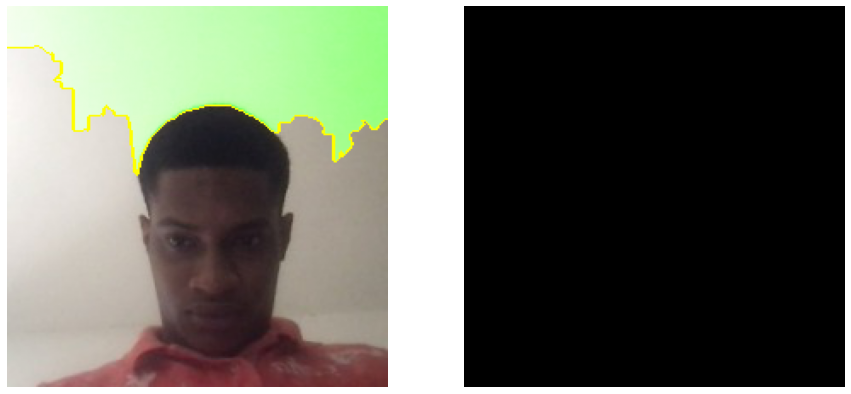

In [5]:
converted_model=r'../smarttens_coach_dataset/PosturePicture.tflite'
import random
# random.shuffle(p);
ds=int(len(p)/1)
print(ds)
for i in range(11386,ds):
  print(i)
  
  img = io.imread(p[i])

  # resized = np.resize(img, (224, 224,3)).astype('uint8')
  # resized = np.expand_dims(resized, axis=0)
  # prediction = run_tflite_model(converted_model, resized)
  # print(prediction)
  # print(predict(resized))

  # plt.imshow(resized.reshape(224, 224, 3))
  # plt.savefig("image1")
  # img = io.imread(p[i])
  resized = np.resize(img, (224, 224,3)).astype('uint8')
  explanation = explainer.explain_instance(resized, predict, top_labels=2, hide_color=0, num_samples=1)
  # temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
  # plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
  # plt.savefig("image1_exp")
  temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1,ax2 ) = plt.subplots(1, 2, figsize=(15,15))
  # fig, (ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(mark_boundaries(temp_2, mask_2))
  ax2.imshow(mark_boundaries(temp_1, mask_1))
  ax1.axis('off')
  ax2.axis('off')
  
  # plt.savefig('/content/drive/MyDrive/LimeImagesExplanations/lime'+str(i)+'.png')
  # plt.savefig('/content/drive/MyDrive/LimeBad/goodlime'+str(i)+'.png')
  plt.savefig('../output/bad/badlime'+str(i)+'.png')

